In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")


In [2]:
file_path="/content/heart_disease.xlsx"
all_sheets=pd.read_excel(file_path,sheet_name=None)
Description=all_sheets["Description"]
hd=all_sheets["Heart_disease"]

In [3]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
hd.shape

(908, 13)

In [5]:
hd.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [6]:
hd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
hd.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [8]:
hd[hd.duplicated()].shape

(1, 13)

In [9]:
hd[hd.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [10]:
hd1=hd.drop_duplicates(ignore_index=True)
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [11]:
hd1["oldpeak"].fillna(hd1["oldpeak"].mean(),inplace=True)

In [12]:
hd1.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [13]:
for col in hd1.columns:
  missing_count=hd1[col][hd1[col]=="?"].count()
  if missing_count > 0:
      print(f"column '{col}' has {missing_count} missing values")
  else:
      print("no missing values")

no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values


In [14]:
# Check for inconsistencies
for col in hd1.columns:
  unique_values = hd1[col].unique()
  print(f"Unique values in column '{col}': {unique_values}")



Unique values in column 'age': [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]
Unique values in column 'sex': ['Male' 'Female']
Unique values in column 'cp': ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values in column 'trestbps': [145 135 140 118 110 160 130 155 170 150 125 120 142 100 102 112 146 138
 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152 148  94 180
 178 101 172  80 114 190 113 154 175 133 131 181 188 193 153 179 143  90
  96 163 161 196 107 167 174 158 192 185 144 169  95  92 200 127 121 166
 177 165 117 116 184  97 186 164 123 151   0 137 182]
Unique values in column 'chol': [233 203 192 186 201 228 276 211 260 175 237 226 273 197 240 250 177 248
 265 303 149 234 160 264 242 302 278 220 294 394 214 219 271 213 245 196
 209 141 340 318 243 238 222 208 236 178 275 308 223 204 269 256 180 360
 239 235 262 257 295 417 212 254 283 244

In [15]:
numerical_cols=hd1.select_dtypes(include=["float","int"])

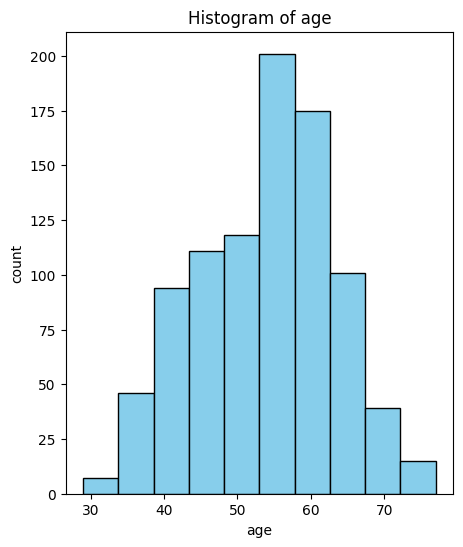

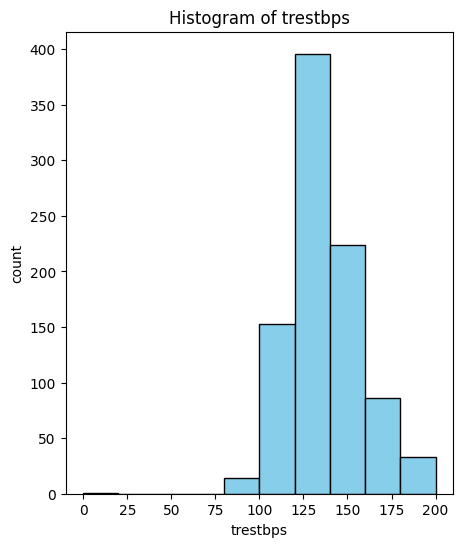

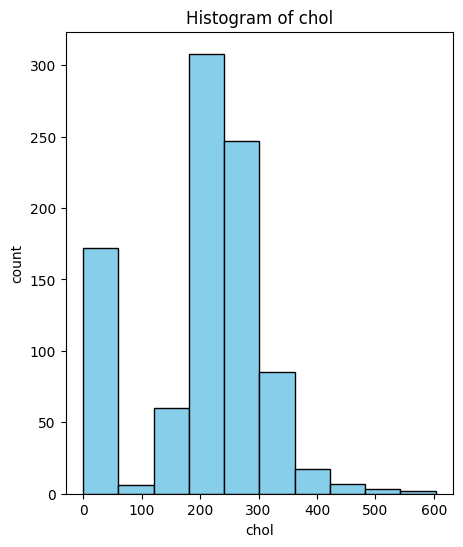

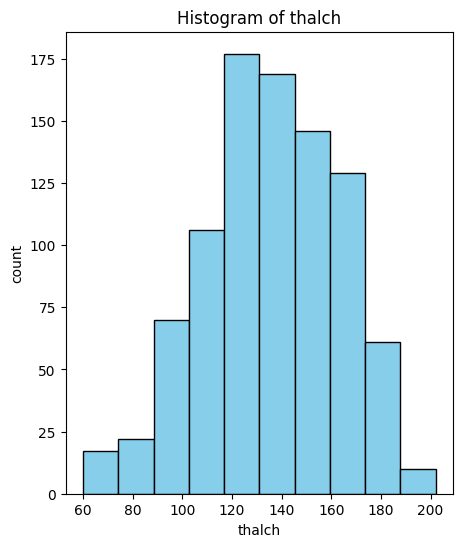

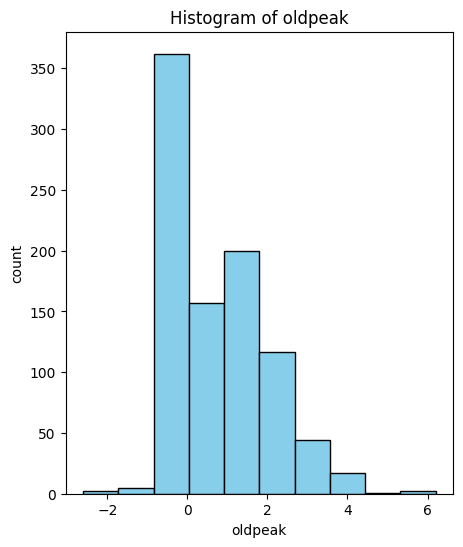

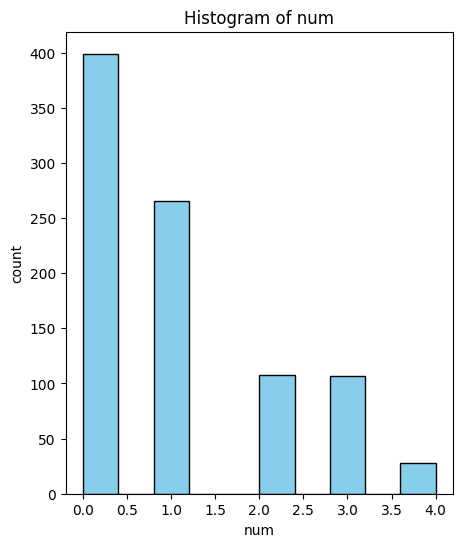

In [16]:
for col in numerical_cols:
  plt.figure(figsize=(5,6))
  plt.hist(hd1[col],color="skyblue",edgecolor="black")
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

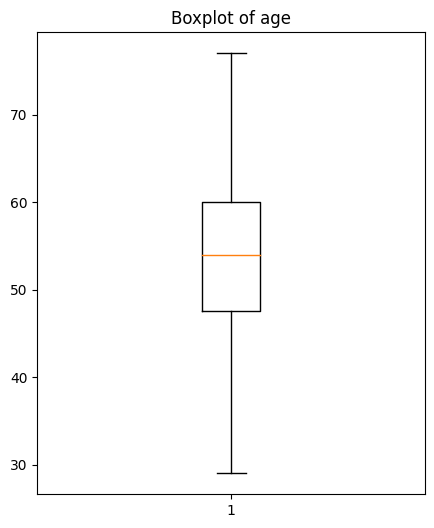

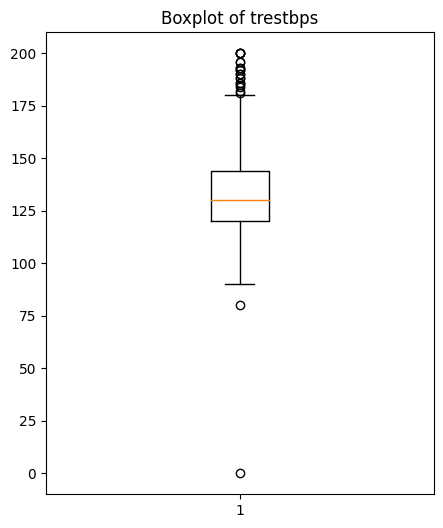

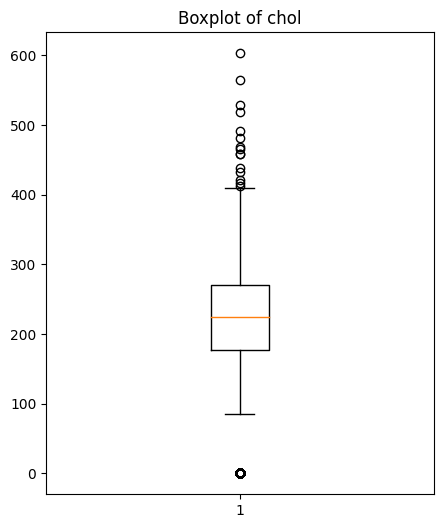

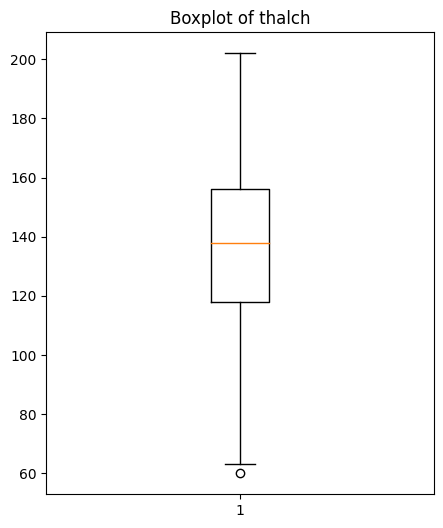

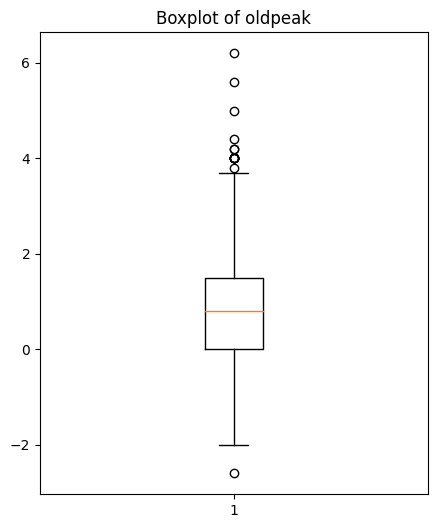

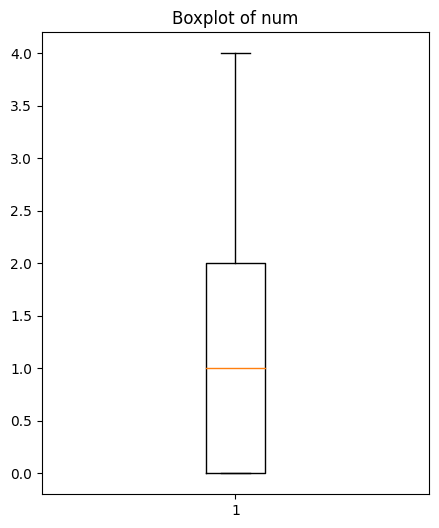

In [17]:
for col in numerical_cols:
  plt.figure(figsize=(5,6))
  plt.boxplot(hd1[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

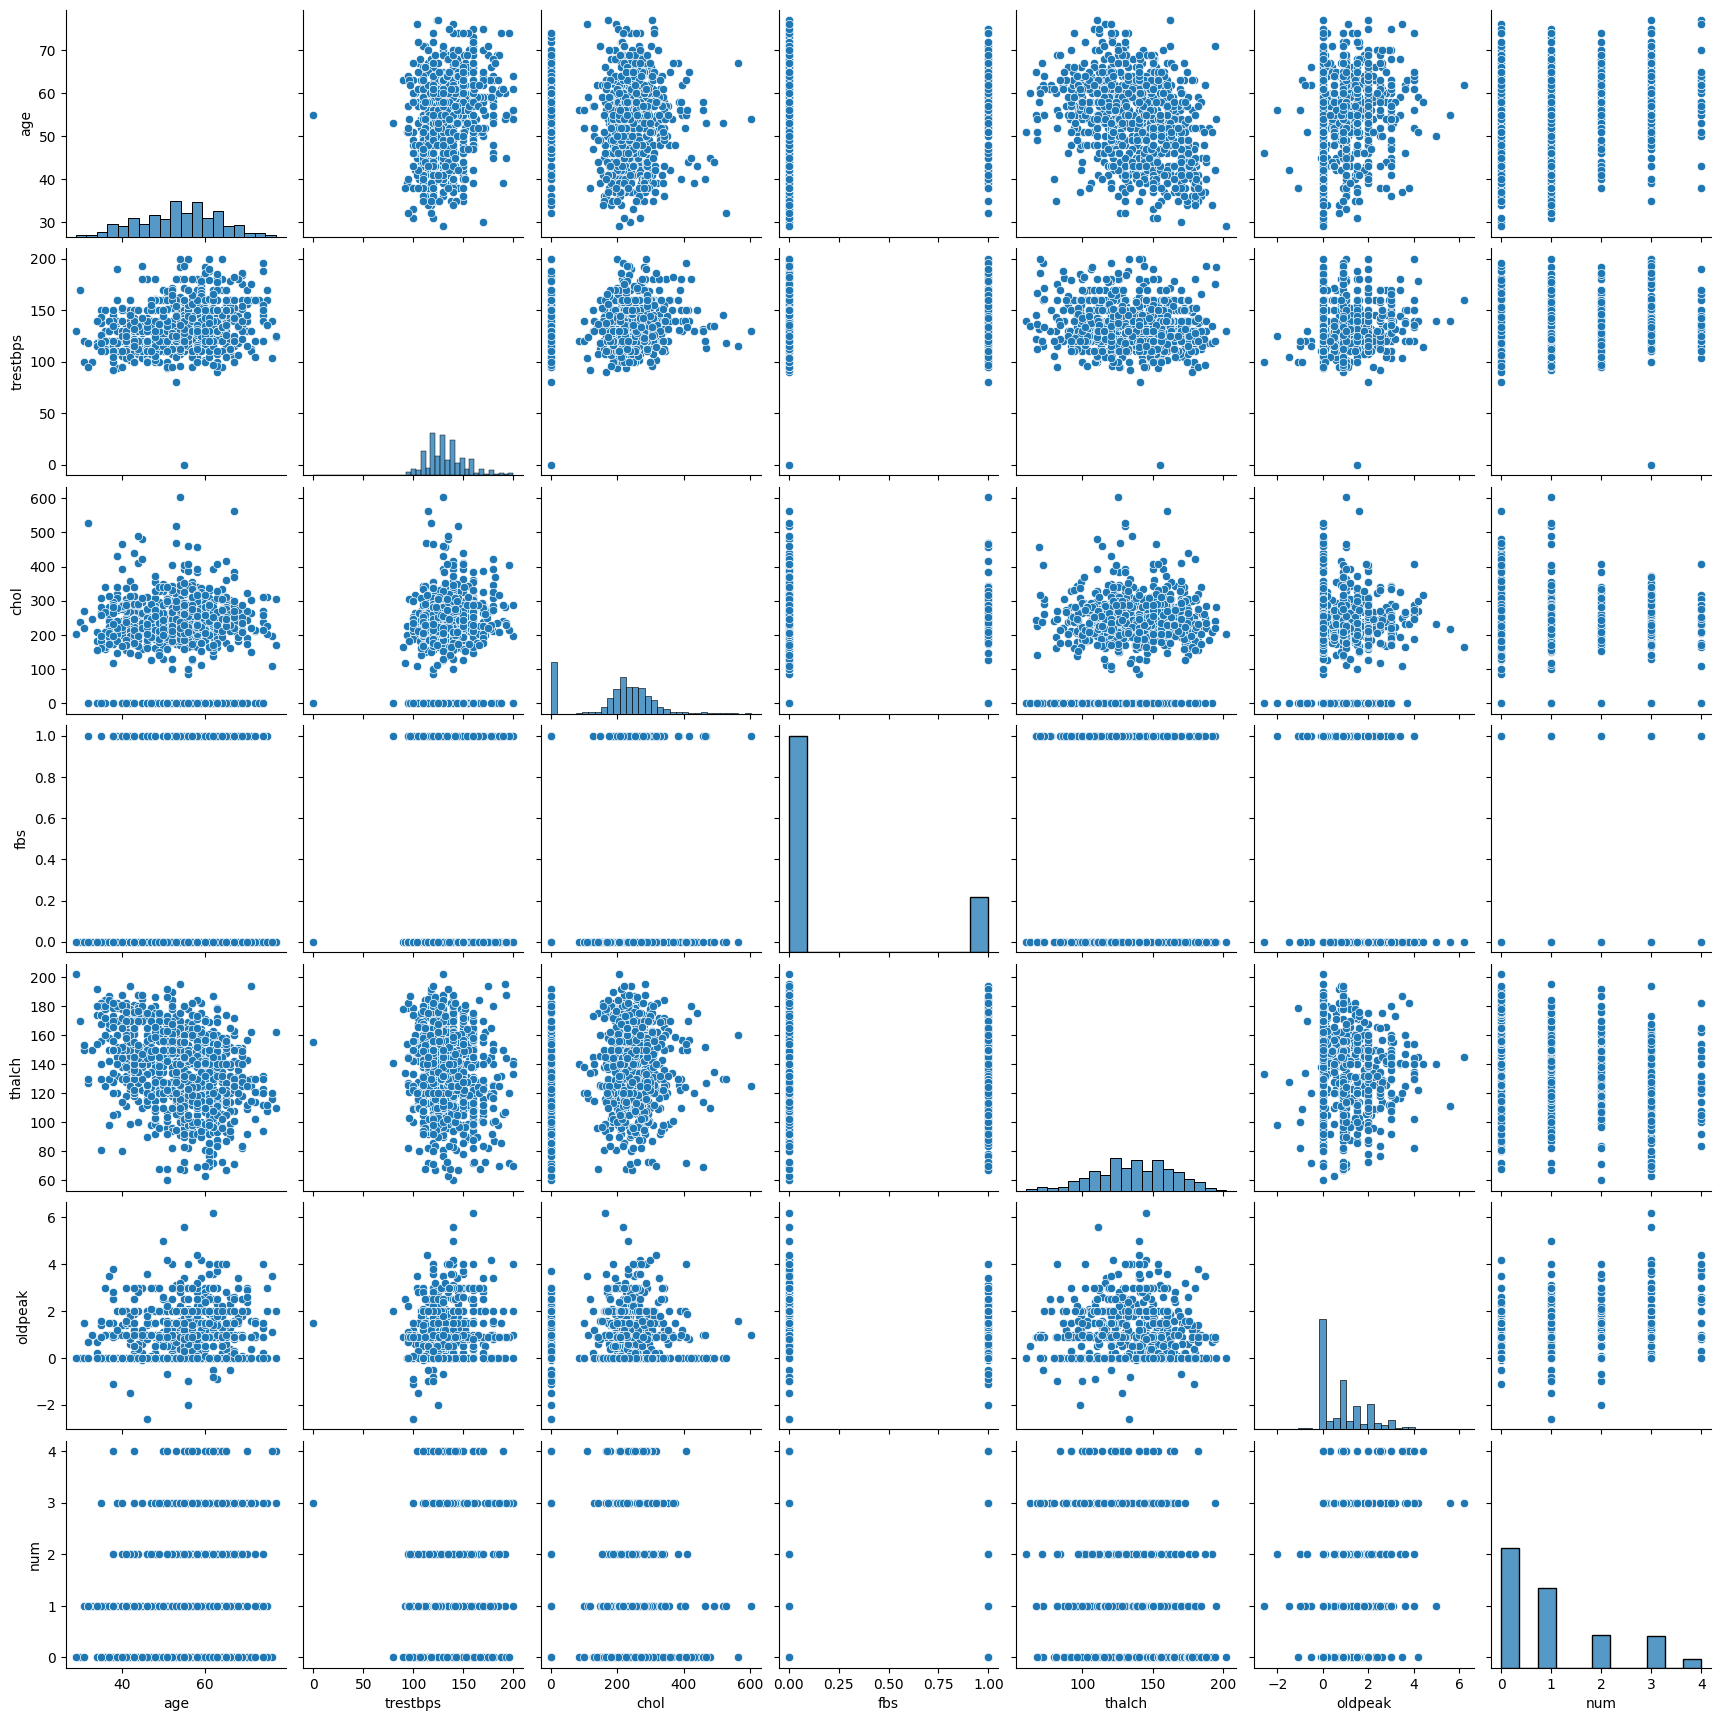

In [18]:
sns.pairplot(hd1)
plt.show()

In [19]:
hd1.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.055993,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [20]:
corr_matrix=pd.DataFrame(hd1.select_dtypes(include="number").corr())
corr_matrix


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253709,-0.100059,-0.327868,0.233303,0.326227
trestbps,0.253709,1.000000,0.117392,-0.132841,0.153079,0.136581
chol,-0.100059,0.117392,1.000000,0.198074,0.028892,-0.239065
thalch,-0.327868,-0.132841,0.198074,1.000000,-0.129477,-0.322632
oldpeak,0.233303,0.153079,0.028892,-0.129477,1.000000,0.417748
num,0.326227,0.136581,-0.239065,-0.322632,0.417748,1.000000


In [21]:
hd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.0+ KB


In [22]:
categorical_cols=hd1.select_dtypes(include=["object"]).columns
for col in categorical_cols:
  le=LabelEncoder()
  hd1[col]=hd1[col].astype(str)
  hd1[col]=le.fit_transform(hd1[col])

In [23]:
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,False,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,False,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,False,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,False,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,0,125,0,False,1,120,1,1.500000,2,2,4
903,62,1,0,166,170,False,2,120,3,3.000000,1,2,4
904,56,1,2,170,0,False,0,123,3,2.500000,0,1,4
905,56,1,2,144,208,True,2,105,2,0.892308,0,0,4


In [24]:
hd1['fbs']=hd1['fbs'].astype(int)

In [25]:
hd1['fbs']=pd.to_numeric(hd1["fbs"],errors='coerce')

In [26]:
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
903,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
904,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
905,56,1,2,144,208,1,2,105,2,0.892308,0,0,4


In [27]:
from sklearn.ensemble import IsolationForest
iso_forest=IsolationForest(contamination=0.05)
outliers=iso_forest.fit_predict(hd1.select_dtypes(include=["number"]))
df_no_outliers=hd1[outliers!=-1].reset_index(drop=True)
df_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,41,1,1,135,203,0,1,132,1,0.0,1,0,0
1,57,1,0,140,192,0,1,148,1,0.4,1,0,0
2,52,1,3,118,186,0,0,190,1,0.0,1,0,0
3,57,1,0,110,201,0,1,126,3,1.5,1,0,0
4,66,1,0,160,228,0,0,138,1,2.3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,65,1,0,136,248,0,1,140,3,4.0,0,2,4
857,51,1,0,110,0,1,1,92,1,0.0,1,0,4
858,62,1,0,160,254,1,2,108,3,3.0,1,1,4
859,53,1,0,125,0,0,1,120,1,1.5,2,2,4


In [28]:
x=df_no_outliers.iloc[:,0:12]
y=df_no_outliers["num"]

In [29]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,41,1,1,135,203,0,1,132,1,0.0,1,0
1,57,1,0,140,192,0,1,148,1,0.4,1,0
2,52,1,3,118,186,0,0,190,1,0.0,1,0
3,57,1,0,110,201,0,1,126,3,1.5,1,0
4,66,1,0,160,228,0,0,138,1,2.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
856,65,1,0,136,248,0,1,140,3,4.0,0,2
857,51,1,0,110,0,1,1,92,1,0.0,1,0
858,62,1,0,160,254,1,2,108,3,3.0,1,1
859,53,1,0,125,0,0,1,120,1,1.5,2,2


In [30]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
856,4
857,4
858,4
859,4


In [31]:
ss=StandardScaler()
hd2=ss.fit_transform(x)

In [32]:
hd2_df=pd.DataFrame(hd2)

In [33]:
corr_matrix=hd2_df.corr()

In [34]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.044092,-0.078000,0.230431,-0.105337,0.157341,-0.011523,-0.329113,0.170480,0.220087,-0.023358,0.055820
1,0.044092,1.000000,-0.160153,0.027059,-0.203579,0.116589,0.067476,-0.181942,0.172489,0.147255,-0.047506,0.070046
2,-0.078000,-0.160153,1.000000,-0.021652,0.092608,-0.051565,-0.096231,0.279582,-0.361607,-0.186985,0.094676,-0.062369
3,0.230431,0.027059,-0.021652,1.000000,0.112449,0.098733,0.058107,-0.101638,0.119718,0.138702,0.056004,0.054208
4,-0.105337,-0.203579,0.092608,0.112449,1.000000,-0.110425,-0.192365,0.206793,-0.042050,0.019998,0.062598,-0.030346
5,0.157341,0.116589,-0.051565,0.098733,-0.110425,1.000000,0.070261,-0.065907,-0.004582,-0.000090,-0.017038,-0.016966
6,-0.011523,0.067476,-0.096231,0.058107,-0.192365,0.070261,1.000000,-0.197435,0.073245,-0.001137,-0.097062,-0.097554
7,-0.329113,-0.181942,0.279582,-0.101638,0.206793,-0.065907,-0.197435,1.000000,-0.332745,-0.152448,0.229590,-0.004992
8,0.170480,0.172489,-0.361607,0.119718,-0.042050,-0.004582,0.073245,-0.332745,1.000000,0.412221,-0.153383,0.094612
9,0.220087,0.147255,-0.186985,0.138702,0.019998,-0.000090,-0.001137,-0.152448,0.412221,1.000000,-0.158469,0.082805


In [35]:
abs_value=corr_matrix.abs()
np.fill_diagonal(abs_value.values,0)
best_corr_value=abs_value.max().max()
best_corr_value

0.4122206105805248

In [36]:
best_corr_indices=np.where(abs_value==best_corr_value)
best_corr_pair=[(hd2_df.index[i],hd2_df.columns[j]) for i,j in zip(*best_corr_indices)]

In [37]:
best_corr_pair

[(8, 9), (9, 8)]

In [38]:
X=hd2_df.iloc[:,0:12]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [40]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [41]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
preds=model.predict(x_test)

In [43]:
np.mean(preds==y_test)

0.5895953757225434

In [44]:
# Accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, preds, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, preds, average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, preds, average='macro')
print("F1-score:", f1)

# ROC-AUC
y_prob = model.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_prob,multi_class='ovr')
print("ROC-AUC:", roc_auc)

# Classification Report (includes precision, recall, F1-score for each class)
print(classification_report(y_test, preds))


Accuracy: 0.5895953757225434
Precision: 0.34089887640449434
Recall: 0.3327282486702776
F1-score: 0.29644210861602166
ROC-AUC: 0.6927707891473882
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        81
           1       0.40      0.78      0.53        46
           2       0.50      0.09      0.15        22
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         5

    accuracy                           0.59       173
   macro avg       0.34      0.33      0.30       173
weighted avg       0.55      0.59      0.53       173



In [45]:
# prompt: how to improve my accuracy

# Hyperparameter Tuning: Experiment with different hyperparameters of the DecisionTreeClassifier
# like max_depth, min_samples_split, min_samples_leaf, etc. using techniques like GridSearchCV or RandomizedSearchCV.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
best_preds = best_model.predict(x_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Improved Accuracy:", accuracy_score(y_test, best_preds))

# Feature Engineering: Create new features or transform existing ones that might be more
# Ensemble Methods: Consider using ensemble methods like Random Forest or Gradient Boosting,
# which often outperform single decision trees.

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Handling Class Imbalance: If your dataset has imbalanced classes, techniques like oversampling,
# undersampling, or using class weights can help improve performance.


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Improved Accuracy: 0.6069364161849711
Random Forest Accuracy: 0.6358381502890174


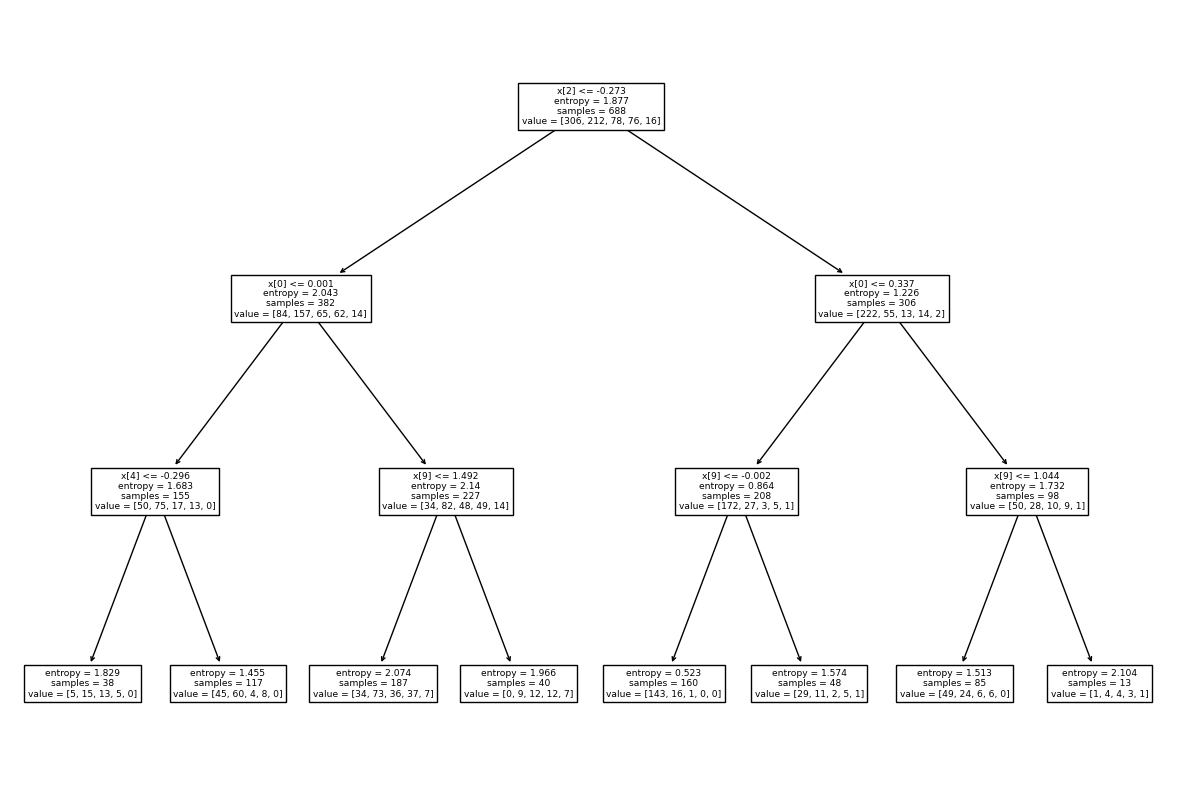

In [58]:
plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()


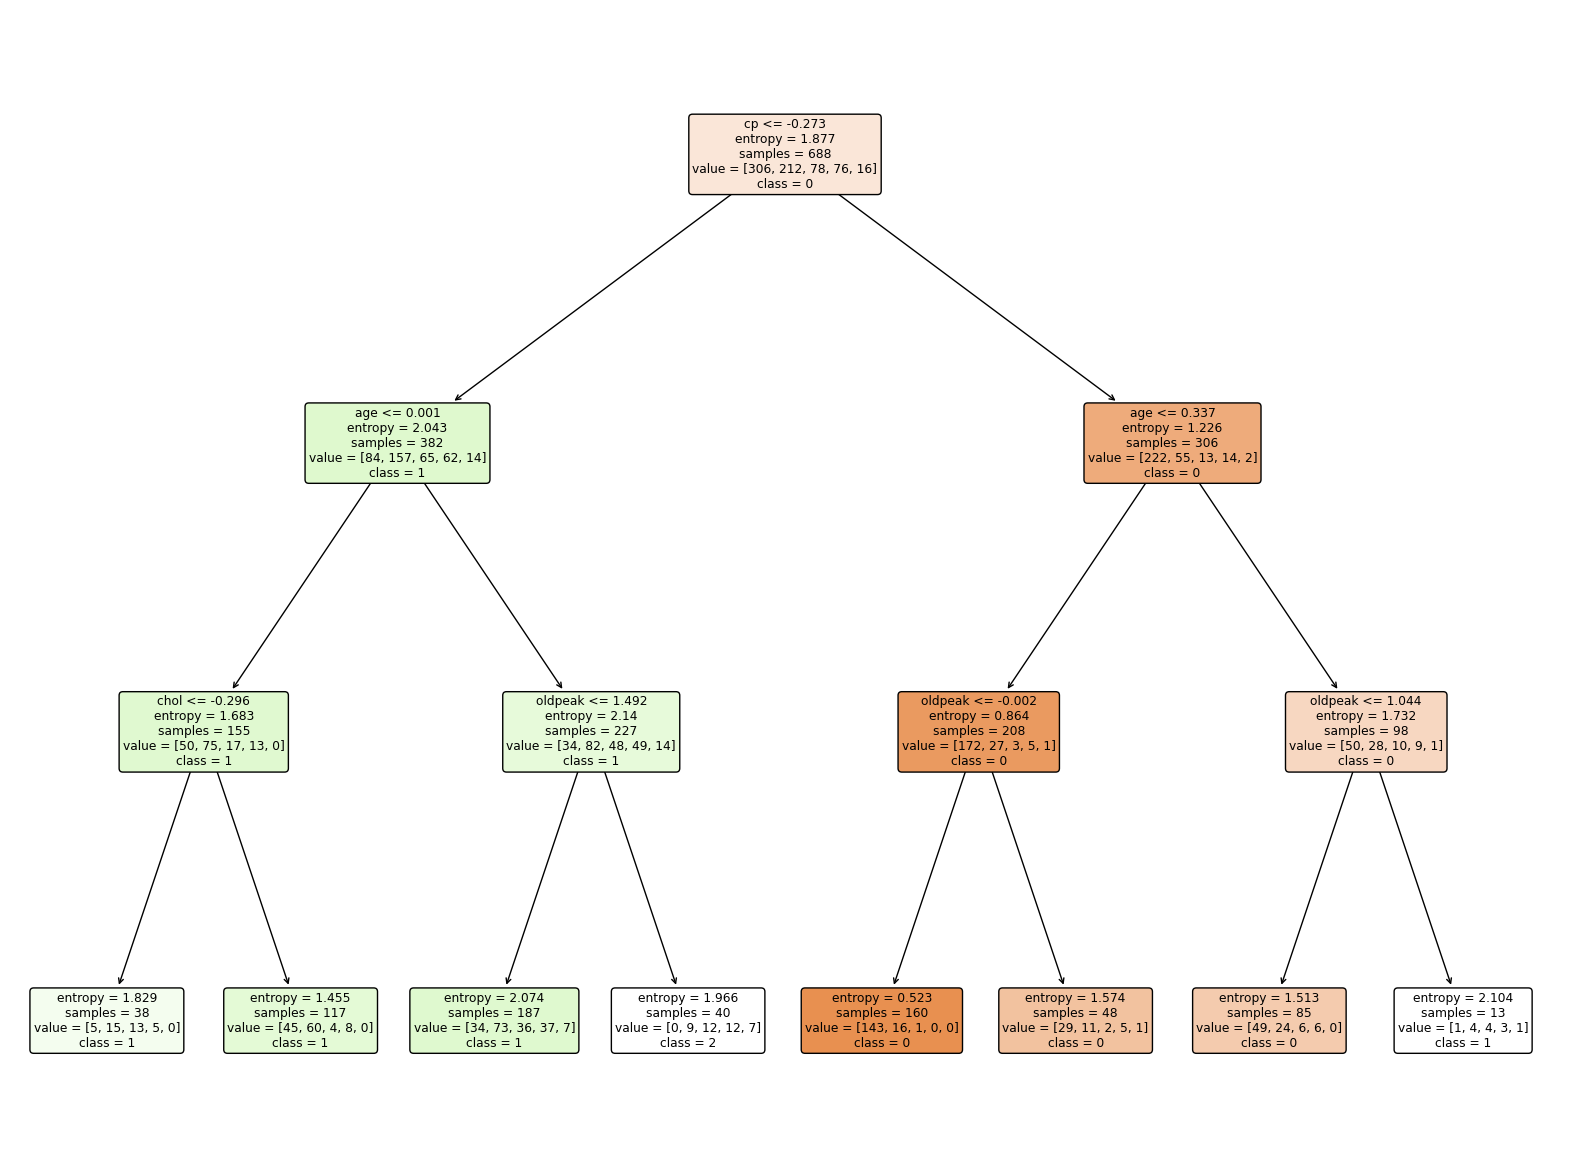

In [57]:
plt.figure(figsize=(20,15))
fn=["age","sex","cp","trestbps","chol","fbs","restecg","thalch","exang","oldpeak","slope","thal"]
cn=["0","1","2","3","4"]
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True,rounded=True)
plt.show()


In [54]:
# Analyze the performance metrics
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# Provide insights based on the metrics
print("\nAnalysis:")
print("- Accuracy of {} indicates the overall correctness of the model's predictions.".format(accuracy))
print("- Precision of {} suggests the model's ability to avoid false positives (predicting a heart disease when there is none).".format(precision))
print("- Recall of {} indicates the model's ability to correctly identify true positives (correctly predicting heart disease).".format(recall))
print("- F1-score of {} balances precision and recall, providing a single metric for overall performance.".format(f1))
print("- ROC-AUC of {} measures the model's ability to distinguish between classes.".format(roc_auc))

# Suggest potential improvements based on the analysis
print("\nPotential Improvements:")
print("- Hyperparameter tuning led to an improved accuracy of {}. Further tuning might yield even better results.".format(accuracy_score(y_test, best_preds)))
print("- Consider exploring ensemble methods like Random Forest, which achieved an accuracy of {} in this case.".format(accuracy_score(y_test, rf_preds)))
print("- If class imbalance is present, address it using techniques like oversampling, undersampling, or class weights.")


Decision Tree Model Performance:
Accuracy: 0.5895953757225434
Precision: 0.34089887640449434
Recall: 0.3327282486702776
F1-score: 0.29644210861602166
ROC-AUC: 0.6927707891473882

Analysis:
- Accuracy of 0.5895953757225434 indicates the overall correctness of the model's predictions.
- Precision of 0.34089887640449434 suggests the model's ability to avoid false positives (predicting a heart disease when there is none).
- Recall of 0.3327282486702776 indicates the model's ability to correctly identify true positives (correctly predicting heart disease).
- F1-score of 0.29644210861602166 balances precision and recall, providing a single metric for overall performance.
- ROC-AUC of 0.6927707891473882 measures the model's ability to distinguish between classes.

Potential Improvements:
- Hyperparameter tuning led to an improved accuracy of 0.5780346820809249. Further tuning might yield even better results.
- Consider exploring ensemble methods like Random Forest, which achieved an accuracy 

Questions

In [ ]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

# Common hyperparameters of decision tree models:

# 1. criterion: The function to measure the quality of a split.
#    - 'gini': Gini impurity (default)
#    - 'entropy': Information gain

# 2. max_depth: The maximum depth of the tree.
#    - None: Tree grows until all leaves are pure or until min_samples_split is reached.
#    - Integer: Limits the depth of the tree, preventing overfitting.

# 3. min_samples_split: The minimum number of samples required to split an internal node.
#    - Integer: Specifies the minimum number of samples.
#    - Float: Specifies the fraction of samples relative to the total number of samples.

# 4. min_samples_leaf: The minimum number of samples required to be at a leaf node.
#    - Integer: Specifies the minimum number of samples.
#    - Float: Specifies the fraction of samples relative to the total number of samples.

# 5. max_features: The number of features to consider when looking for the best split.
#    - None: Consider all features.
#    - Integer: Consider a fixed number of features.
#    - Float: Consider a fraction of features.
#    - 'auto', 'sqrt', 'log2': Use heuristics to determine the number of features.

# How these hyperparameters affect performance:

# - criterion: Affects how the tree chooses splits. Gini impurity and information gain often lead to similar results.
# - max_depth: Controls the complexity of the tree. Larger depths can lead to overfitting, while smaller depths might underfit.
# - min_samples_split and min_samples_leaf: Prevent overfitting by controlling the size of the leaves. Larger values lead to simpler trees.
# - max_features: Influences the diversity of splits. Using fewer features can reduce overfitting.


In [60]:
#2. What is the difference between the Label encoding and One-hot encoding? explain
#Both label encoding and one-hot encoding are techniques used to convert categorical data into a numerical format that can be understood by machine learning algorithms. However, they have different approaches and implications.
#Label Encoding

# Assigns a unique integer to each category.
#Preserves ordinal relationships: If the categories have a natural order (e.g., low, medium, high), this order is preserved in the encoded values.
#Suitable for: Ordinal categorical variables.
#Example: For categories "small", "medium", and "large", label encoding might assign 0, 1, and 2, respectively.

#One-Hot Encoding

# Creates a binary vector for each category.
#Each category becomes a separate feature.
#Values are 0 or 1: 1 indicates the presence of the category, while 0 indicates absence.
#Suitable for: Nominal categorical variables (no inherent order).
#Example: For categories "red", "green", and "blue", one-hot encoding would create three new features: "red" (0 or 1), "green" (0 or 1), and "blue" (0 or 1).



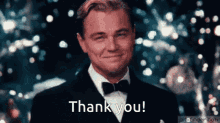